In [1]:
## This Notebook generates subsets and Figures shown in Suplementary Figure 1, Mayr et al, 2020
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import bbknn

from matplotlib import colors
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

folder = "/191118_MLT-ASK_multiomics/"
sc.logging.print_version_and_date()

Running Scanpy 1.4.5.post3.dev19+g86aea584, on 2020-02-12 13:50.


In [2]:
## Read in Human data object of Munich Cohort
adata = sc.read(folder + "munich_cohort_human_dataset.h5ad")

### Clustering and Patient IDs - Figure Supp 1 a b

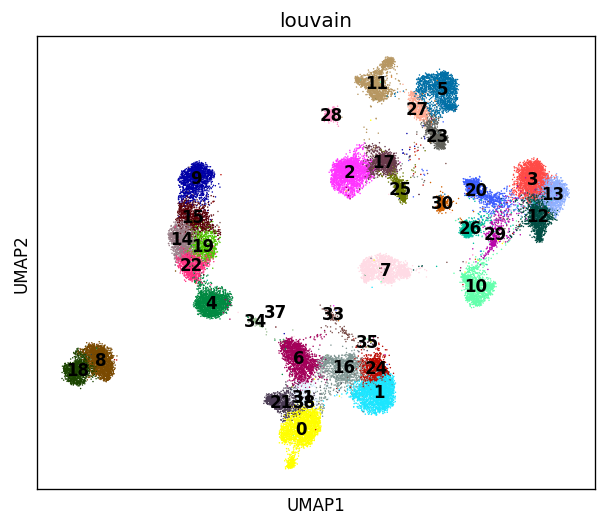

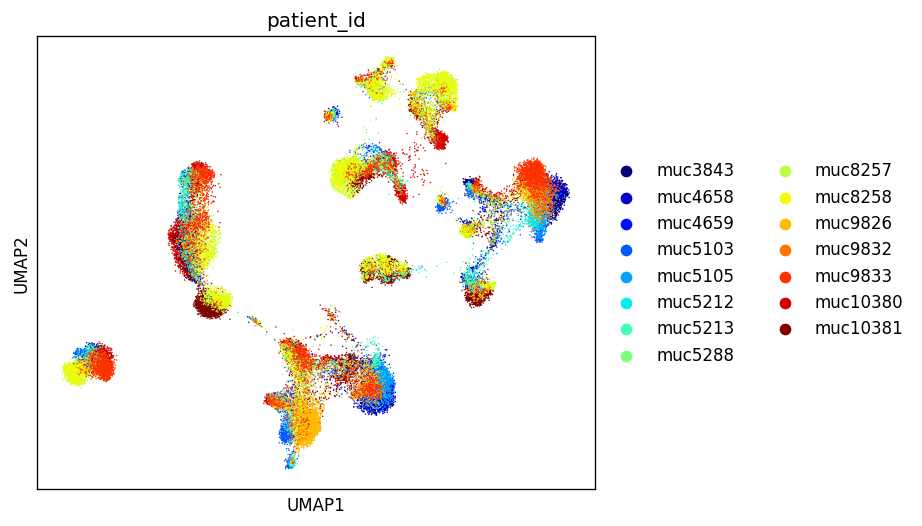

In [4]:
sc.pl.umap(adata, color = "louvain", ax = plt.figure(figsize = (6, 5), dpi = 120).gca(), legend_loc = "on data")
sc.pl.umap(adata, color = "patient_id", ax = plt.figure(figsize = (6, 5), dpi = 120).gca(), palette = "jet")

### COL1A2+ Mesenchyme - Figure Supp 1 c d e

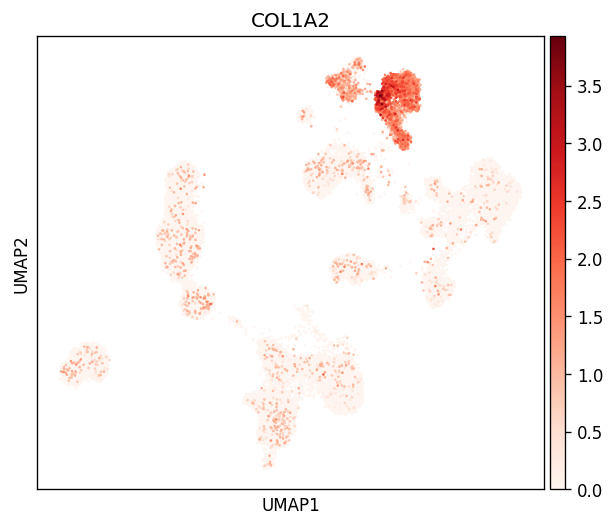

In [3]:
sc.pl.umap(adata, color = "COL1A2", size = 10, ax = plt.figure(figsize = (6, 5), dpi = 120).gca(), cmap = mymap)

In [4]:
## Subset to mesenchymal cells and exclude low quality cells
mes = adata[adata.obs["louvain"].isin(["27", "11", "5", "23","30"])]
mes = mes[-(mes.obs["patient_id"].isin(["muc4659", "muc5288", "muc5105"])) | 
           (mes.obs["louvain"].isin(["6"]))].copy()

computing PCA with n_comps = 25
    on highly variable genes
    finished (0:00:04)
--> added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


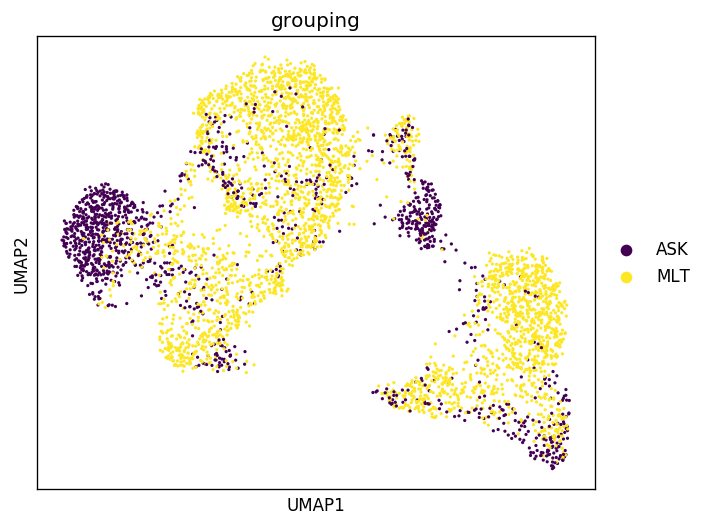

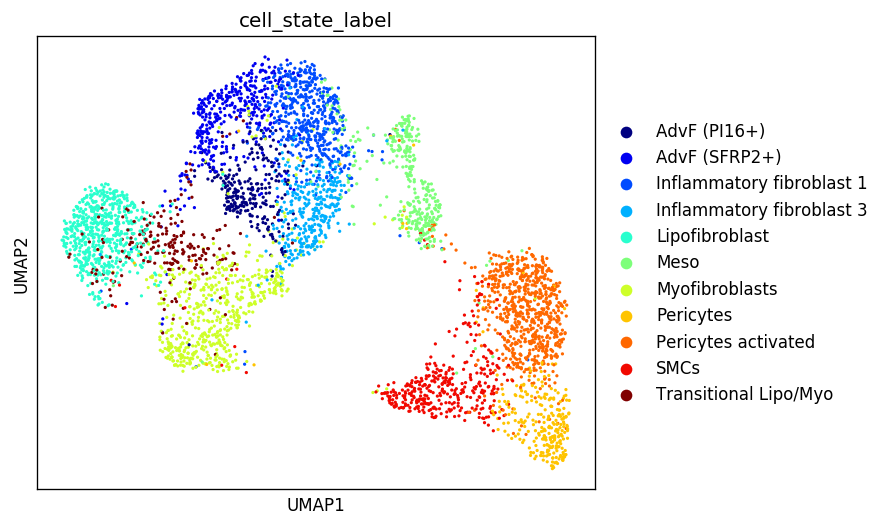

In [7]:
## PCA and UMAP subset
sc.pp.pca(mes, n_comps = 25)
bbknn.bbknn(mes, neighbors_within_batch = 5, n_pcs = 15, batch_key = "patient_id")
sc.tl.umap(mes, min_dist = 0.4)
sc.pl.umap(mes, color = "health_status", size = 15, ax = plt.figure(figsize = (6, 5), dpi = 120).gca())
sc.pl.umap(mes, color = "cell_state_label", size = 15, ax = plt.figure(figsize = (6, 5), dpi = 120).gca())

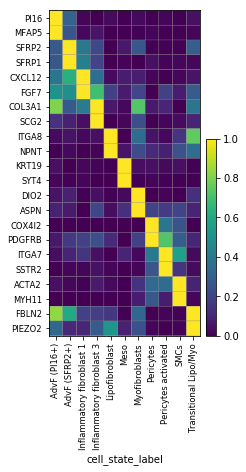

GridSpec(2, 3, height_ratios=[0, 6], width_ratios=[2.8, 0, 0.2])

In [6]:
mes_markers = ["PI16", "MFAP5", "SFRP2", "SFRP1", "CXCL12", "FGF7", "COL3A1", "SCG2", "ITGA8", "NPNT", "KRT19",
               "SYT4", "DIO2", "ASPN", "COX4I2", "PDGFRB", "ITGA7", "SSTR2", "ACTA2","MYH11", "FBLN2", "PIEZO2"]

sc.pl.matrixplot(mes, mes_markers, groupby = "cell_state_label", swap_axes = True, 
                 standard_scale = "var", figsize=(3,6))

### EPCAM+ Epithelialium - Figure Supp 1 f g h

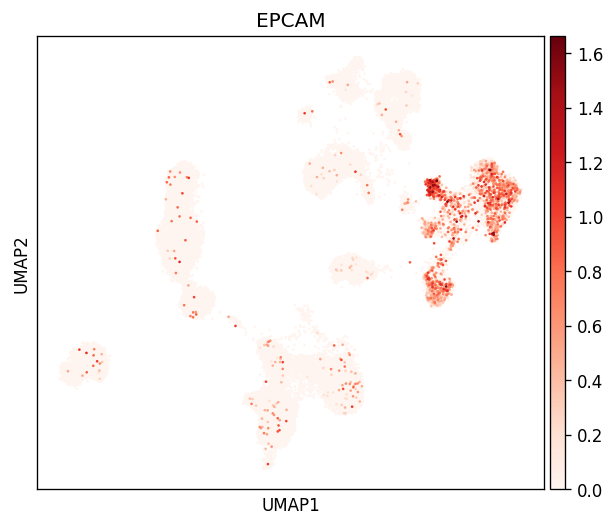

In [8]:
sc.pl.umap(adata, color = "EPCAM", size = 10, ax = plt.figure(figsize = (6, 5), dpi = 120).gca(), cmap = mymap)

In [9]:
## Subset to epithelial clusters
epithel = adata[adata.obs.louvain.isin(["20", "3", "13", "26", "10", "29", "12"])].copy()

computing PCA with n_comps = 20
    on highly variable genes
    finished (0:00:04)
--> added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:30)


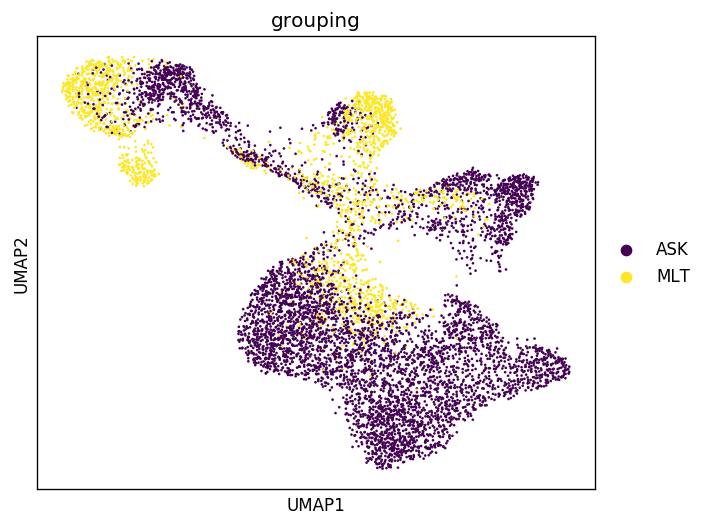

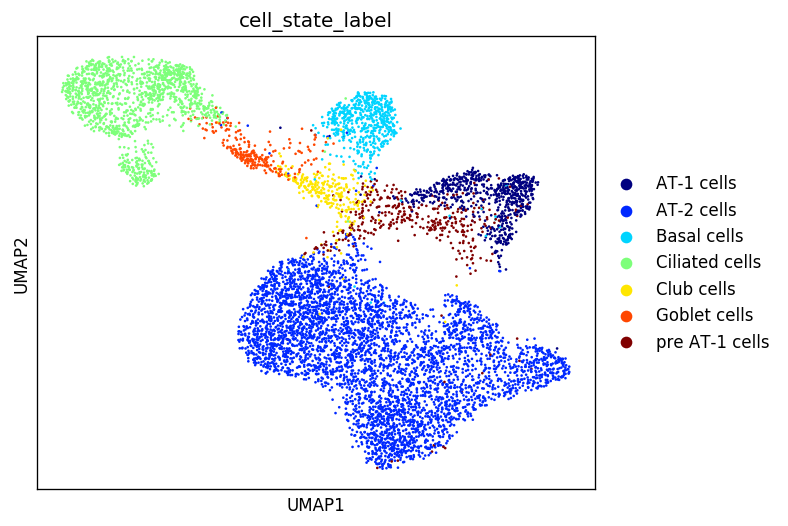

In [10]:
## Recalculate PCA and UMAP on subset
sc.pp.pca(epithel, n_comps = 20)
bbknn.bbknn(epithel, neighbors_within_batch = 20, n_pcs = 25, batch_key = "patient_id")
sc.tl.umap(epithel)
sc.pl.umap(epithel, color = "health_status", size = 10, ax = plt.figure(figsize = (6, 5), dpi = 120).gca())
sc.pl.umap(epithel, color = "cell_state_label", size = 10, ax = plt.figure(figsize = (6, 5), dpi = 120).gca())

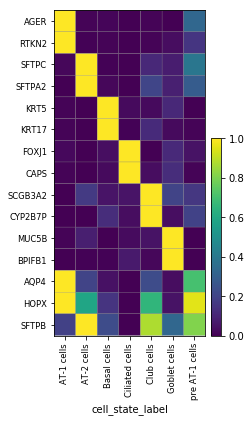

GridSpec(2, 3, height_ratios=[0, 6], width_ratios=[2.8, 0, 0.2])

In [11]:
epithel_markers=["AGER","RTKN2","SFTPC","SFTPA2","KRT5","KRT17","FOXJ1","CAPS","SCGB3A2","CYP2B7P","MUC5B","BPIFB1",
                 "AQP4","HOPX","SFTPB"]

sc.pl.matrixplot(epithel, epithel_markers, groupby = "cell_state_label", swap_axes = True, 
                 figsize=(3,6), standard_scale = "var")

### CLDN5+ Endothelium - Figure Supp 1 i j k

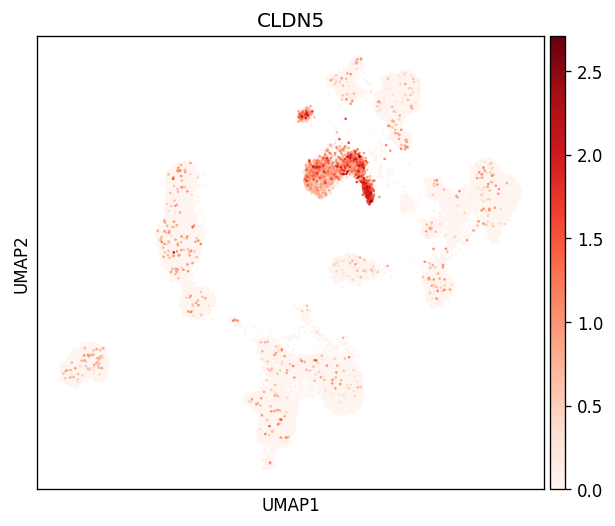

In [12]:
sc.pl.umap(adata, color = "CLDN5", size = 10, ax = plt.figure(figsize = (6, 5), dpi = 120).gca(), cmap = mymap)

In [13]:
## Subset to endothelial clusters
endothel = adata[adata.obs.louvain.isin(["2", "17", "25", "28"])].copy()

computing PCA with n_comps = 20
    on highly variable genes
    finished (0:00:03)
--> added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


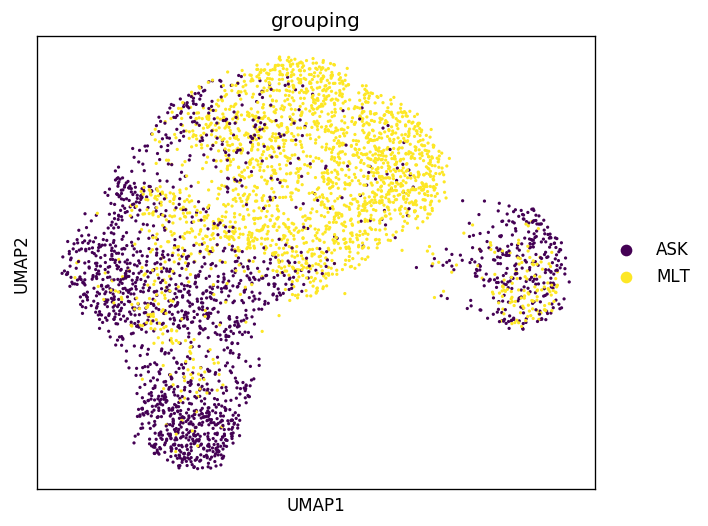

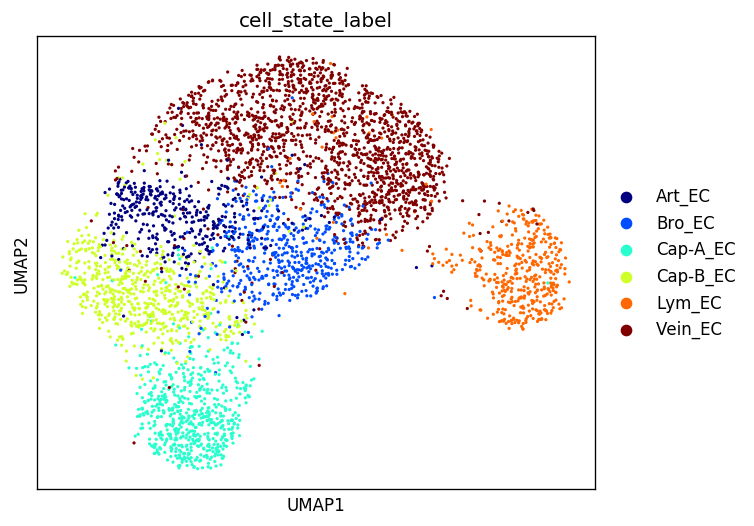

In [14]:
## Recalculate PCA and UMAP on subset
sc.pp.pca(endothel, n_comps = 20)
bbknn.bbknn(endothel, neighbors_within_batch = 3, n_pcs = 20, batch_key = "patient_id")
sc.tl.umap(endothel)
sc.pl.umap(endothel, color = "health_status", size = 15, ax = plt.figure(figsize = (6, 5), dpi = 120).gca())
sc.pl.umap(endothel, color = "cell_state_label", size = 15, ax = plt.figure(figsize = (6, 5), dpi = 120).gca())

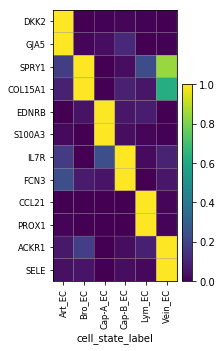

GridSpec(2, 3, height_ratios=[0, 5], width_ratios=[2.3, 0, 0.2])

In [15]:
endothel_markers=["DKK2","GJA5","SPRY1","COL15A1","EDNRB","S100A3","IL7R","FCN3","CCL21","PROX1","ACKR1","SELE"]

sc.pl.matrixplot(endothel, endothel_markers, groupby = "cell_state_label", standard_scale = "var", 
                 swap_axes = True, figsize = (2.5,5))

### PTPRC+ Leukocyte and Myeloid - Figure Supp 1 l m n

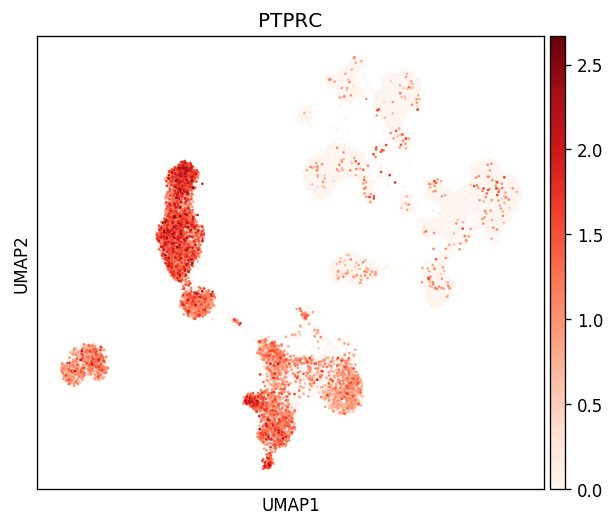

In [16]:
sc.pl.umap(adata, color = "PTPRC", size = 10, ax = plt.figure(figsize = (6, 5), dpi = 120).gca(), cmap = mymap)

In [17]:
## Subset to leukocyte clusters
macro = adata[adata.obs["louvain"].isin(["9", "14", "15", "19","22", "34", "6", "16", "35","24", "1", "21", "31",
                                         "38","0", "8","18","37","7","33","4"])].copy()

computing PCA with n_comps = 20
    on highly variable genes
    finished (0:00:09)
--> added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:31)


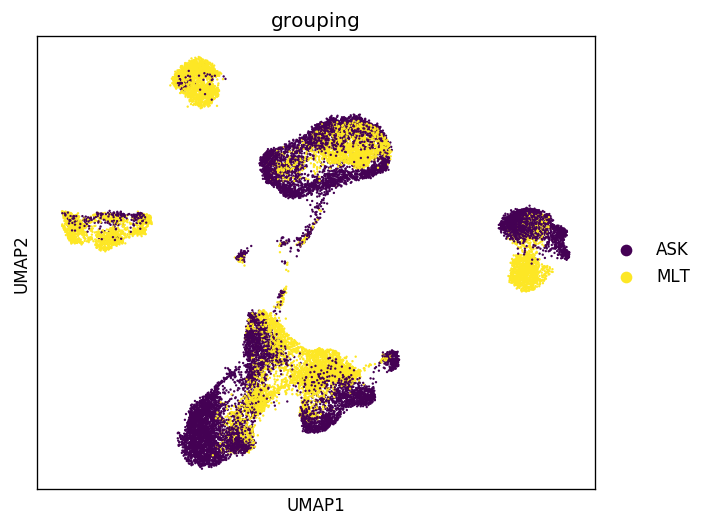

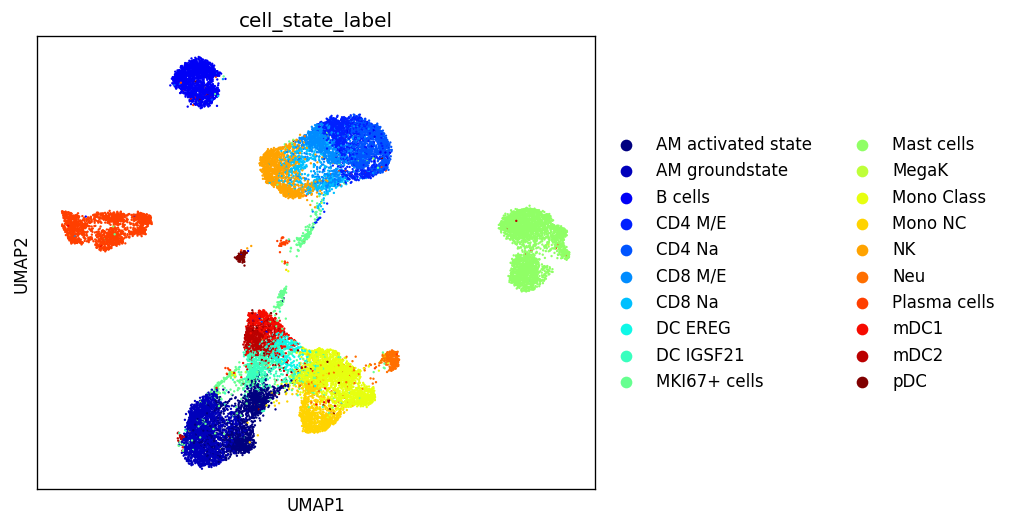

In [18]:
## Regcalculate PCs and UMAP
sc.pp.pca(macro, n_comps = 20)
bbknn.bbknn(macro, neighbors_within_batch = 10, n_pcs = 20, batch_key = "patient_id")
sc.tl.umap(macro, min_dist = 0.4)
sc.pl.umap(macro, color = "health_status", size = 8, ax = plt.figure(figsize = (6, 5), dpi = 120).gca())
sc.pl.umap(macro, color = "cell_state_label", size = 8, ax = plt.figure(figsize = (6, 5), dpi = 120).gca())

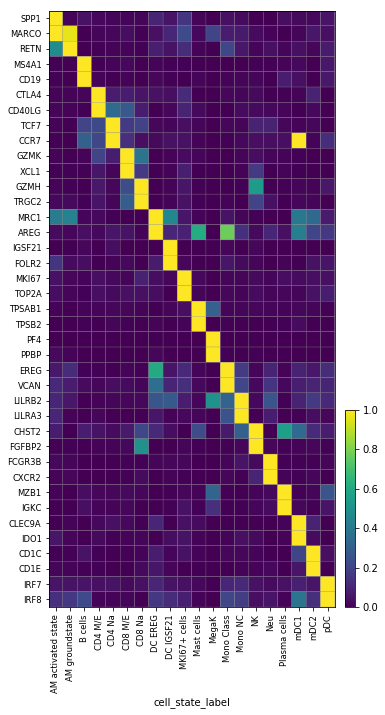

GridSpec(2, 3, height_ratios=[0, 11], width_ratios=[5.3, 0, 0.2])

In [19]:
macro_markers = ["SPP1", "MARCO", "RETN", "MS4A1", "CD19", "CTLA4", "CD40LG", "TCF7", "CCR7", "GZMK", "XCL1",
                 "GZMH", "TRGC2", "MRC1", "AREG", "IGSF21", "FOLR2", "MKI67", "TOP2A", "TPSAB1", "TPSB2", "PF4", 
                 "PPBP", "EREG", "VCAN", "LILRB2", "LILRA3", "CHST2", "FGFBP2", "FCGR3B", "CXCR2", "MZB1",
                 "IGKC", "CLEC9A", "IDO1", "CD1C", "CD1E", "IRF7", "IRF8"]

sc.pl.matrixplot(macro, macro_markers, groupby = "cell_state_label", swap_axes = True,
                 standard_scale = "var", figsize = (5.5,11))